# 支持向量机（Support Vector Machine, SVM）
支持向量机是一种监督学习模型，广泛用于回归和分类任务。

SVM的核心思想是找到一个最佳的超平面，将不同类别的数据点分开，同时最大化类别之间的间隔（margin）。

支持向量是距离超平面最近的那些数据点，它们决定了超平面的位置和方向。

### 超平面
- 在二维空间中，超平面是一个直线；
- 在三维空间中，超平面是一个平面；
- 在更高维度中，超平面是一个n-1维的子空间。

### 支持向量
- 支持向量是距离超平面最近的样本点，这些对超平面的定义起着关键作用；
- 支持向量机通过最大化支持向量到超平面的距离（即最大化间隔）来实现选择最佳的超平面。

### 核函数
- 对于非线性问题，SVM使用核函数将数据映射到更高维的空间，以便在该空间中找到线性可分的超平面。
- 常用的核函数包括线性核、多项式核和径向基函数（RBF）核。
- 核函数的选择对SVM的性能有显著影响。

### SVM分类流程
1. 选择一个能够最大化分类边界的超平面；
2. 通过支持向量机算法，选择离超平面最近的样本点作为支持向量——训练支持向量；
3. 选择一个最优超平面，使得间隔最大化；
4. 使用核函数处理非线性数据。


### python实现SVM分类


Model accuracy: 0.80


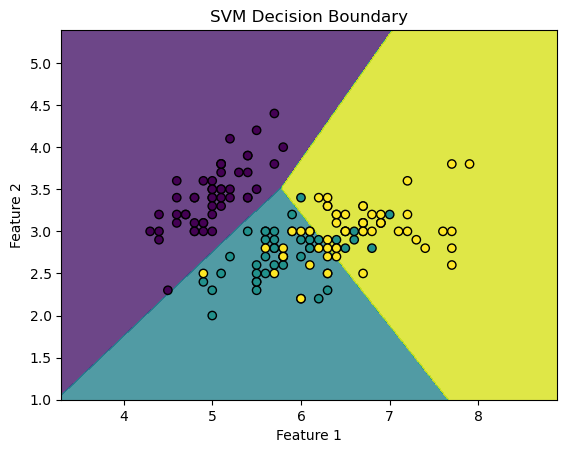

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # only take the first two features for easy visualization
y = iris.target

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create SVM classifier
clf = svm.SVC(kernel='linear', C=1.0)

# train the model
clf.fit(X_train, y_train)

# predict on the test set
y_pred = clf.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")

# visualize decision boundary
def plot_decision_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel(X.columns[0] if hasattr(X, 'columns') else 'Feature 1')
    plt.ylabel(X.columns[1] if hasattr(X, 'columns') else 'Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(clf, X, y)